## Short Answer  
Please answer each of the following questions with **at least 2-3 complete sentences**. 

1. Why do we use a validation dataset during training, and what can the performance between the validation dataset and the training set tell us?

A validation dataset allows the neural network to check the accuracy of the training, based on the weights that are derived from the training set. The training set is used to determine the weights, which is tested within the validation set, in order to determine whether or not the weights are appropriate for the network, not just the given training set, lowering the risk of overfitting.

2. What is the major difference between a fully-connected layer and a convolutional layer in terms of the scale of patterns they look for in their input?

A fully-connected layer connects the nodes from one layer to those of another. A convolutional layer applies an actual function to convolute the input in order to obtain a different feature map. A convolutional layer can look for features from a specific domain of a previous input, while a fully connected layer will examine the input based on the entire previous layer in order to "fully connect" the data.

3. If you performed 128 convolutions with filter size 3x3 and a stride of 1 on an input that is 100x100x64 and padded the inputs, what would the output shape be of this layer? 

Using a stride of 1, and a filter size of 3x3, an input of 100x100x64 would simply become another 100x100x64 size image, since the padding of the inputs eliminates any downsizing. In addition, the stride of 1 would not skip any data, leaving the same size input image.

4. Matrix A has a shape of 250x200 and matrix B has a shape of 250x100. Can you perform a matrix multiplication between A and B in that order without performing any other operations first (True or False)?

False, in order to perform matix multiplication, the amount of columns of the first matrix must match the amount of rows in the second matrix. In order to multiply the matrices, additional reformations would be neccessary, they cannot be multiplied at the current moment.

5. Matrix A has a shape of 3x5 and matrix B has a shape of 3x5. Can these two matrices be added together elementwise (True or False)?

True, In order to add matrices, the shapes of the matrices must be the same, which is true. To add, the matrice elements would simply combine in their proper positions, resulting in a matrix of the same size.


In [0]:
try:
  import tflearn
except ImportError:
  !pip3 install -q tflearn
  import tflearn

In [0]:
import numpy as np
import os
from google.colab import drive
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.conv import conv_2d
from tflearn.activations import relu
from tflearn.layers.normalization import batch_normalization as bn
from tflearn.layers.estimator import regression
from tflearn.data_utils import to_categorical
import matplotlib.pyplot as plt

In the line below, create a matrix full of zeros with 90 rows and 50 columns. Then print the row with index 5 in this matrix.

In [0]:
matrix = np.zeros([90, 50])

In [4]:
print(matrix[5,...])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


In [0]:
# load in the flowers dataset
import tflearn.datasets.oxflower17 as oxflower17
X, Y = oxflower17.load_data(one_hot=True, resize_pics=(100, 100))

In the line below, print the shapes of the data and labels. These shapes will help you later when defining the network.

In [6]:
print(X.shape, Y.shape)

(1360, 100, 100, 3) (1360, 17)


In [7]:
print(X.shape)

(1360, 100, 100, 3)


Below, show the image with index 500 in the dataset X.

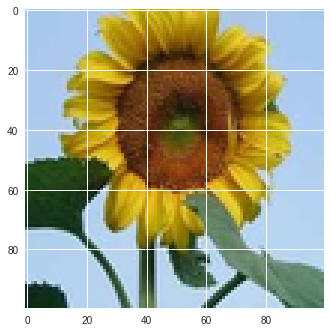

In [8]:
plt.imshow(X[500,...])

In the line below, plot a histogram of X using an appropriate number of bins.

(array([1., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1.]),
 array([   3.        ,   41.77142857,   80.54285714,  119.31428571,
         158.08571429,  196.85714286,  235.62857143,  274.4       ,
         313.17142857,  351.94285714,  390.71428571,  429.48571429,
         468.25714286,  507.02857143,  545.8       ,  584.57142857,
         623.34285714,  662.11428571,  700.88571429,  739.65714286,
         778.42857143,  817.2       ,  855.97142857,  894.74285714,
         933.51428571,  972.28571429, 1011.05714286, 1049.82857143,
        1088.6       , 1127.37142857, 1166.14285714, 1204.91428571,
        1243.68571429, 1282.45714286, 1321.22857143, 1360.        ]),
 <a list of 35 Patch objects>)

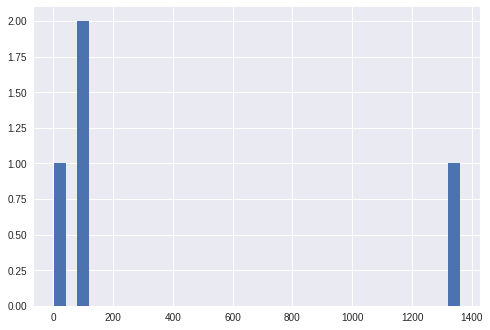

In [25]:
plt.hist(X.shape, bins=35)

In the line below, normalize the images by subtracting the mean and dividing by the standard deviation of every pixel. 

In [0]:
X_mean = np.mean(X, 0) # get mean pixel value at every location in image
X = X - X_mean # subtract mean of each pixel location from every pixel in that location
stdX = np.std(X)
Xnorm =np.divide(X , stdX)

You will now create a convolutional neural network to predict the flower species from the images. In the line below, create an input layer for the network based on the shape of the images. 

In [0]:
input_layer = tflearn.input_data([None, 100, 100, 3])

In the line below, finish the line and create a convolutional layer to take in the input layer and slide 64 filters with shape 7x7 around it using the relu activation function. You might find the documentation for the conv_2d function helpful: http://tflearn.org/layers/conv/

In [12]:
conv1 = conv_2d(input_layer, 64, 7, activation='relu')

Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.


In the line below, I have created a second convolutional layer which will take in the first convolutional layer's feature maps as input. Write a comment to indicate 1) how many filters this layer has, 2) what the filter size is, and 3) what the height and width of each output feature map should be based on the stride.

In [0]:
# 128 filters
# 3 x 3 size 
# 25 x 25 
conv2 = conv_2d(conv1, 128, 3, activation='relu', strides=4)

In the line below, replace the question marks with appropriate values, keeping in mind this will be the output layer of the network.

In [0]:
output_layer = fully_connected(conv2, 15, activation='softmax')

In the line below, remove the question mark and replace it with an appropriate value for the learning rate.

In [0]:
opt = regression(output_layer, optimizer='adam', learning_rate=.001, loss='categorical_crossentropy')

You don't need to do anything for the line below. 

In [0]:
model = tflearn.DNN(opt)

In the line below, replace each question mark with appropriate values and write a comment next to each line describing what it does (you only need to comment the lines I write *comment here* after.).

In [0]:
model.fit(X, # Input data points of images
          Y, # Labels for the input image data
          validation_set=0.1, # Portion of training set dedicated towards validation
          show_metric=True, 
          n_epoch=10,  # How many times to run through the entire data set 
          batch_size=75,  # How many images of data to take in during a single step
          snapshot_step=200)

Download this notebook and upload it to your branch on the class github. 

In [0]:
model.save('oxflower17')